In [2]:
# Import image libraries
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

## Step 0 - Load image

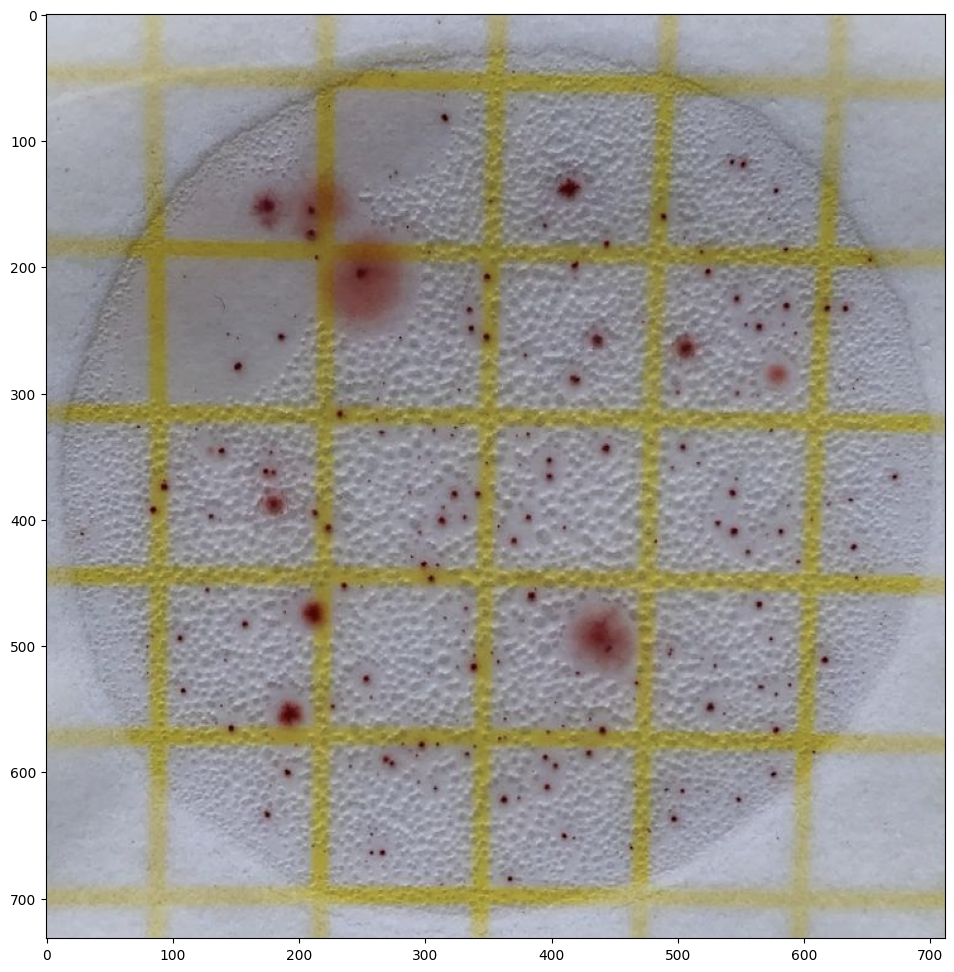

In [3]:
# Open the image file
img_path = 'data/sample_1.png'
img_path_mini = 'data/sample_1_mini.png'

with Image.open(img_path) as img:
    img_array = np.array(img)

# Display image img_array
plt.figure(figsize=(12,12))
bin = plt.imshow(img_array)

## Step 1 - Add exposure filter

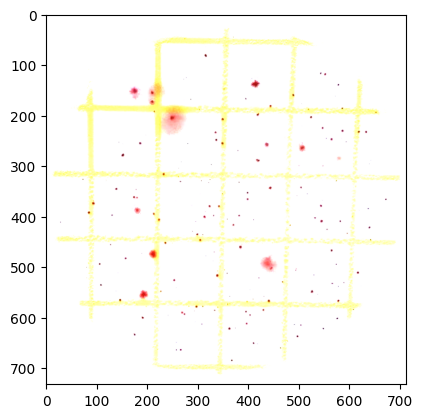

In [4]:
from PIL import ImageEnhance

# Open the image file
img_path = 'data/sample_1.png'
with Image.open(img_path) as img:
    # Increase the exposure by a factor of 1.5
    enhancer = ImageEnhance.Brightness(img)
    img_exposed = enhancer.enhance(3)

# Display the exposed image
a = plt.imshow(img_exposed)


In [5]:
#convert to numpy array
img_exposed = np.array(img_exposed)

In [6]:
# Convert the image to a numpy array
img_exposed.shape

(732, 712, 4)

## Step 2 - Convert the image to a 2D array

(732, 712)


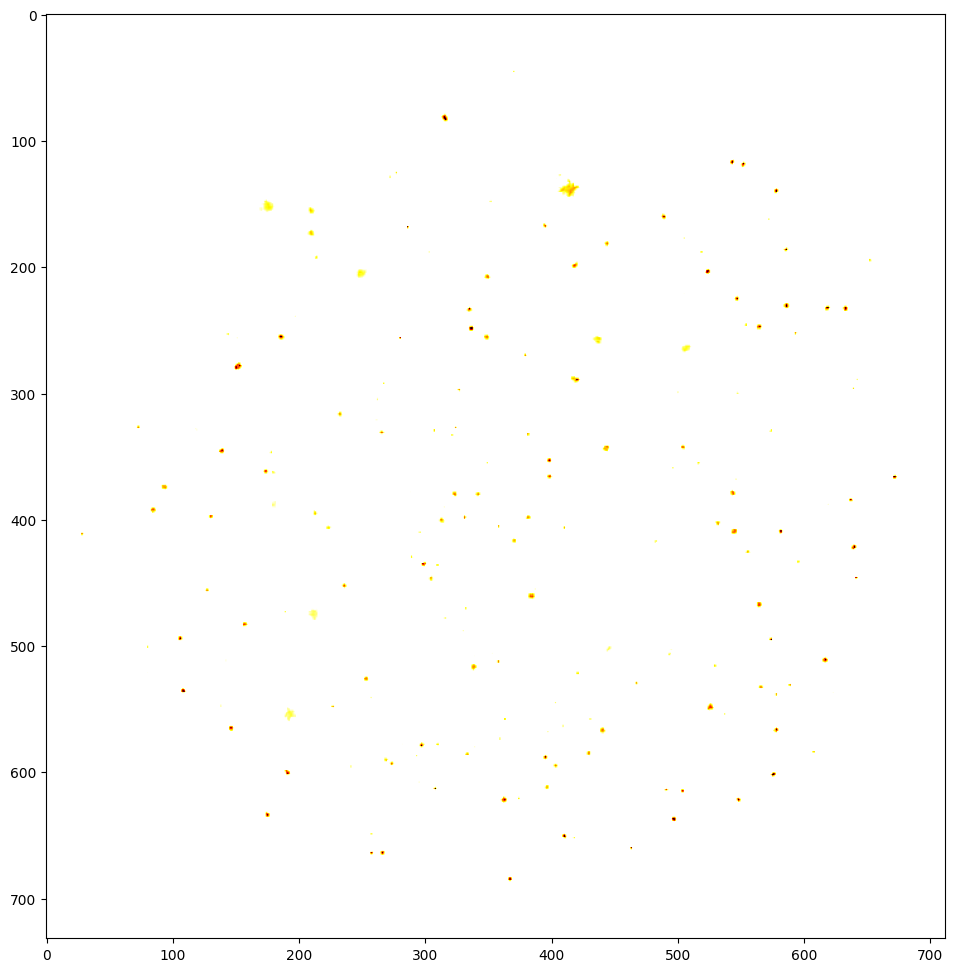

In [33]:
# Extract the red channel
red_channel = img_exposed[:,:,0]
print(red_channel.shape)

# Display image img_array
plt.figure(figsize=(12,12))
bin = plt.imshow(red_channel, cmap='hot')

## Step 3 - Filter redish pixels

### Apply mask based on THRESHOLD

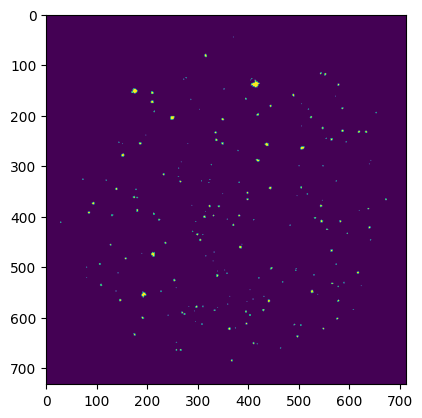

In [43]:
# Define the threshold to calibrate the filter
THRESHOLD = 254

# Apply the threshold
red_filter = red_channel < THRESHOLD

# Transform from bool to int
red_filter_int = 1 * red_filter

# Display the thresholded image
bin = plt.imshow(red_filter)

### Get coordinates of the filtered (red) points

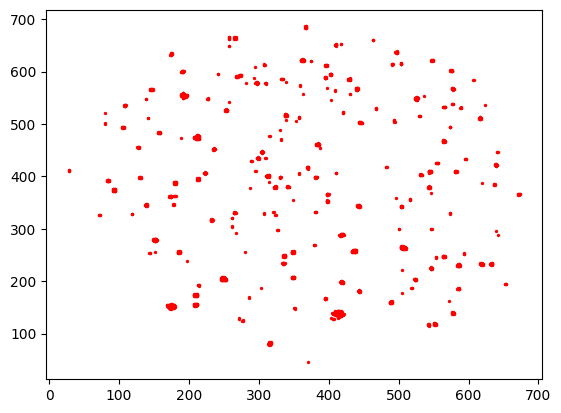

In [49]:
X = np.where(red_filter)
bin = plt.scatter(X[1], X[0], s=2, c='r', marker='o')
plt.show()

## Step 4 - Train clustering model

In [70]:
# Apply DBSCAN to find the define the clusters
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan.fit(np.array(X).T)

DBSCAN(eps=2, min_samples=3)

In [71]:
# Count unique labels
print("Number of red pixels:", len(set(dbscan.labels_)))
dbscan.labels_ += 1

Number of red pixels: 135


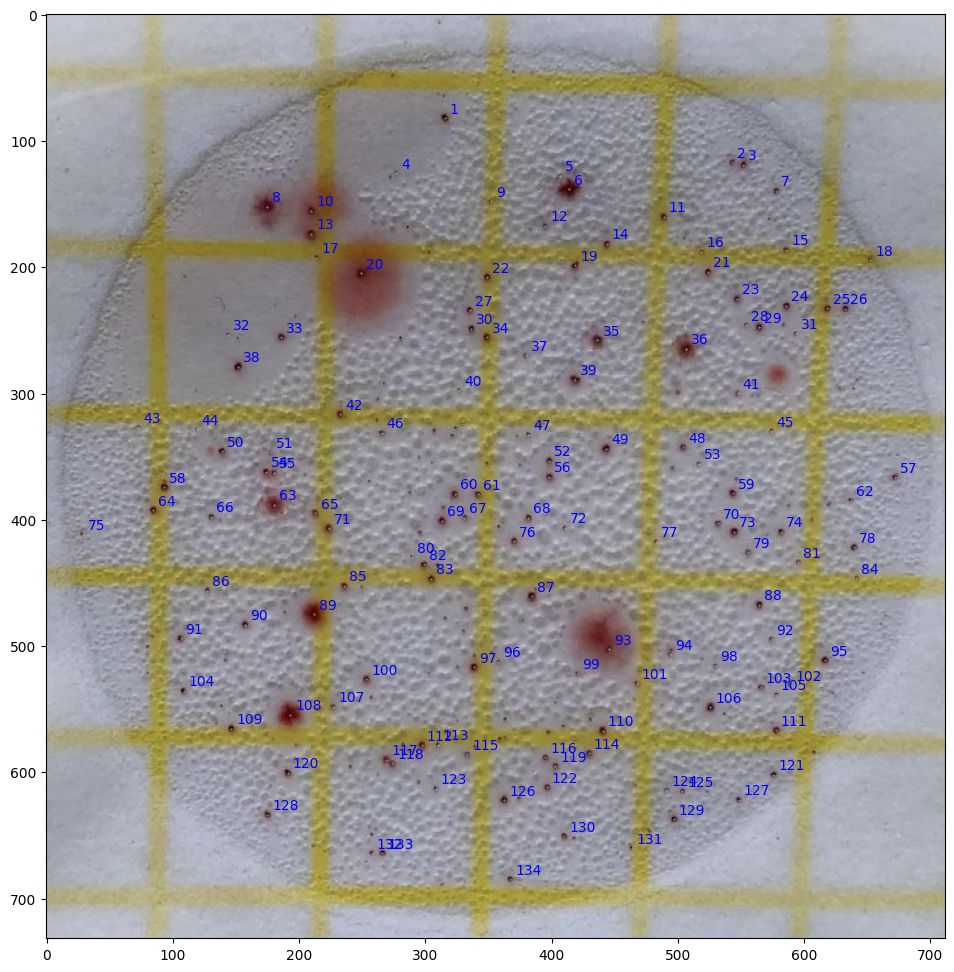

In [72]:
SHOW_CENTER = True

# Keep same random seed
np.random.seed(0)

# Display clusters on the image
plt.figure(figsize=(12, 12))
plt.imshow(img_array)

# Add data on each cluster center
for label in set(dbscan.labels_):
    if label != 0:
        # Compute the center of the cluster
        cluster_center = np.mean(X[0][dbscan.labels_ == label]), np.mean(X[1][dbscan.labels_ == label])
        
        if SHOW_CENTER:
            # Add a point at the center of the cluster
            plt.scatter(cluster_center[1], cluster_center[0], c='white', s=.08, alpha=1)
        
        # Add the cluster number
        shift_text = 4
        plt.text(cluster_center[1] + shift_text, cluster_center[0] - shift_text, str(label), fontsize=10,  color='blue')
